<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-03 12:56:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.9MB/s    in 3.5s    

2025-08-03 12:56:59 (57.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 191.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 147.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 157.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 170.9 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
pri
nt(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [19]:
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna()
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]


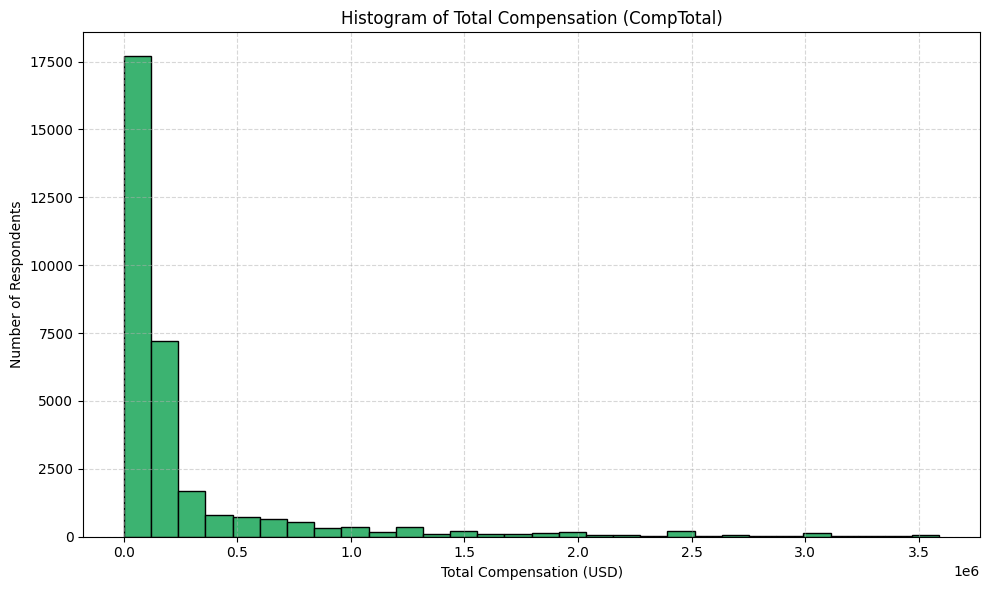

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [23]:
query = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)
def clean_experience(val):
    try:
        if isinstance(val, str):
            val = val.strip().lower()
            if 'less than' in val:
                return 0.5
            elif 'more than' in val:
                return 51
            else:
                return float(val)
        return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df = df.dropna()
df = df[df['YearsCodePro'] <= 50]

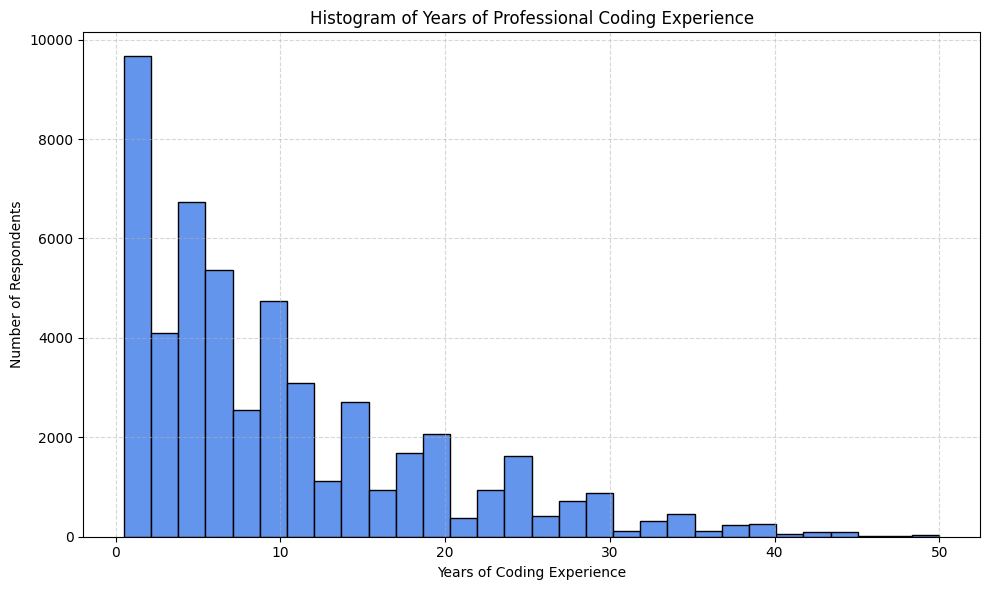

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [10]:
def simplify_age(age_str):
    try:
        if '18-24' in age_str:
            return '18–24'
        elif '25-34' in age_str:
            return '25–34'
        elif '35-44' in age_str:
            return '35–44'
        elif '45-54' in age_str:
            return '45–54'
        elif '55-64' in age_str:
            return '55–64'
        elif '65 or older' in age_str:
            return '65+'
        else:
            return 'Other'
    except:
        return 'Other'


In [11]:
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])
df['AgeGroup'] = df['Age'].apply(simplify_age)

df = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]
age_groups = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
colors = ['skyblue', 'mediumseagreen', 'salmon', 'plum', 'gold', 'lightgray']


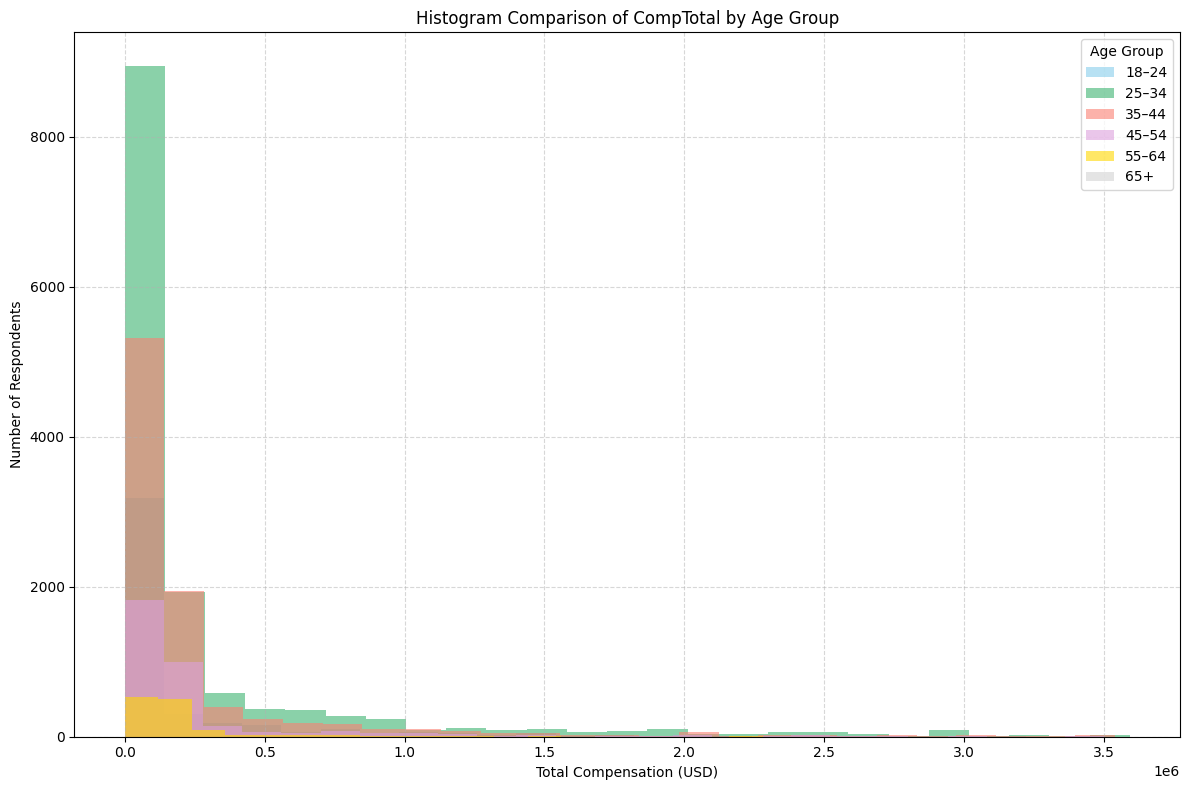

In [12]:
plt.figure(figsize=(12, 8))

for i, group in enumerate(age_groups):
    subset = df[df['AgeGroup'] == group]
    plt.hist(subset['CompTotal'], bins=25, alpha=0.6, label=group, color=colors[i])

plt.title('Histogram Comparison of CompTotal by Age Group')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [21]:
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"

In [24]:
def convert_time(time_str):
    time_str = time_str.lower()
    if 'less than' in time_str:
        return 10
    elif '15-30' in time_str:
        return 22
    elif '30-60' in time_str:
        return 45
    elif '60-120' in time_str:
        return 90
    elif 'over 120' in time_str or 'more than' in time_str:
        return 135
    else:
        return None

df['AgeGroup'] = df['Age'].apply(simplify_age)
df['TimeSearchingMinutes'] = df['TimeSearching'].apply(convert_time)
df = df.dropna(subset=['TimeSearchingMinutes'])


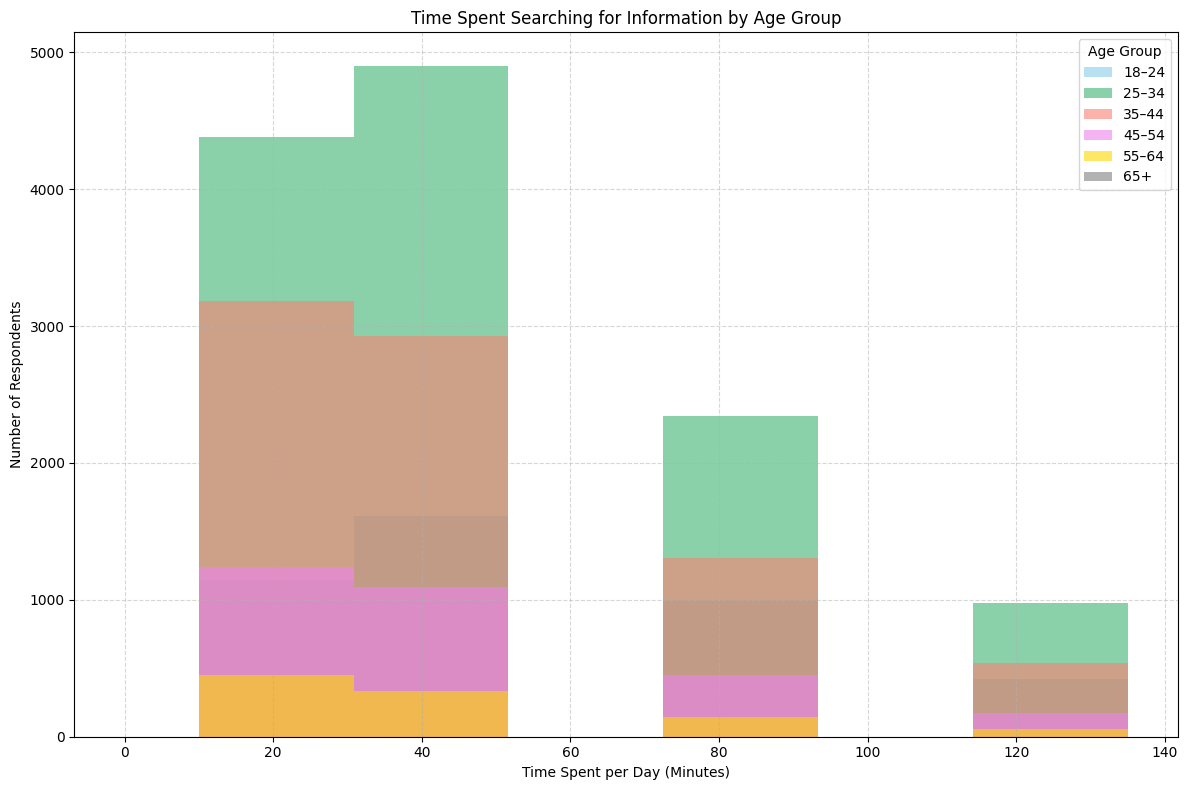

In [25]:
plt.figure(figsize=(12, 8))
age_groups = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
colors = ['skyblue', 'mediumseagreen', 'salmon', 'violet', 'gold', 'gray']

for i, group in enumerate(age_groups):
    subset = df[df['AgeGroup'] == group]
    plt.hist(subset['TimeSearchingMinutes'], bins=6, alpha=0.6, label=group, color=colors[i])

plt.title('Time Spent Searching for Information by Age Group')
plt.xlabel('Time Spent per Day (Minutes)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


### **3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [30]:
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)
from collections import Counter

all_dbs = []
for row in df['DatabaseWantToWorkWith']:
    dbs = [db.strip() for db in str(row).split(';')]  
    all_dbs.extend(dbs)

db_counts = Counter(all_dbs)
top5 = db_counts.most_common(5)

labels = [item[0] for item in top5]
values = [item[1] for item in top5]


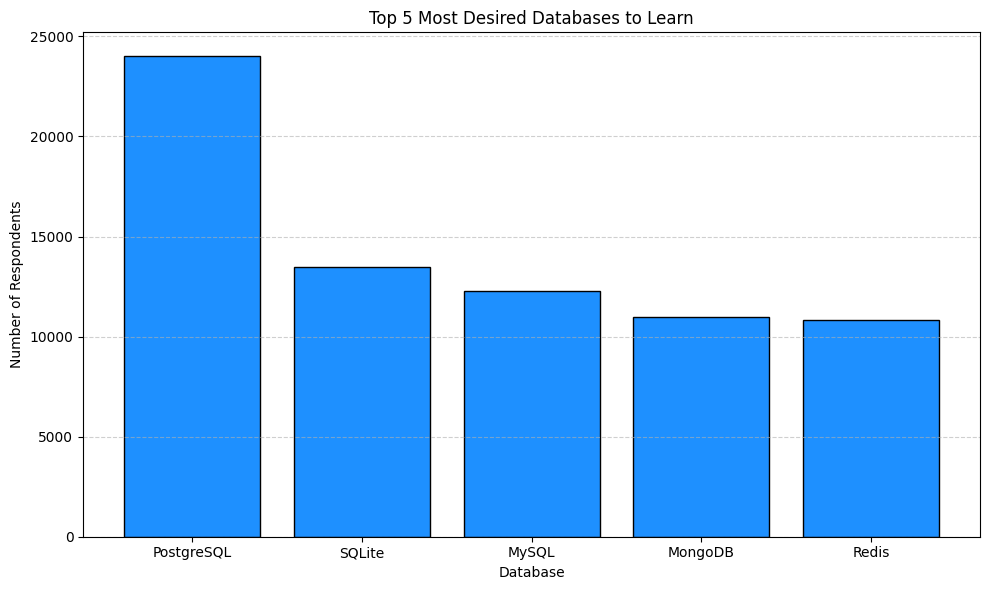

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='dodgerblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_301/2990974845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


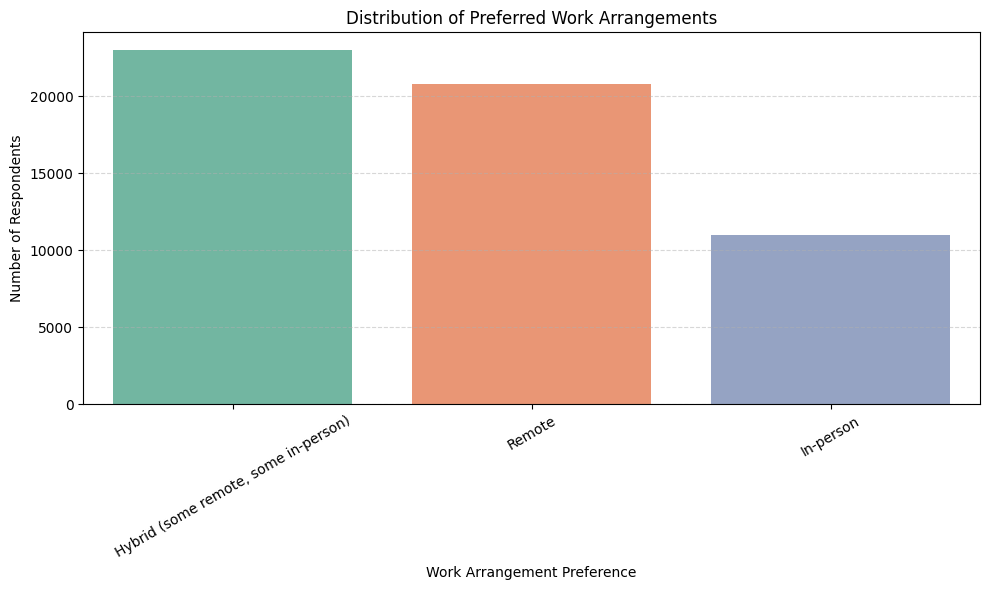

In [34]:
import seaborn as sns
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [35]:
conn = sqlite3.connect('survey-data.sqlite')

query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

import random

def map_age_random(age_str):
    try:
        age_str = age_str.lower().strip()
        if '-' in age_str:
            low, high = age_str.replace(' years old', '').split('-')
            return random.randint(int(low), int(high))
        elif 'under' in age_str:
            return random.randint(10, 17)
        elif '65 or older' in age_str:
            return random.randint(65, 75)
        else:
            return None
    except:
        return None

random.seed(42)
df['AgeMapped'] = df['Age'].apply(map_age_random)
df_filtered = df[(df['AgeMapped'] >= 45) & (df['AgeMapped'] <= 60)]
df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['CompTotal'])
df_filtered = df_filtered[df_filtered['CompTotal'] <= df_filtered['CompTotal'].quantile(0.95)]


/tmp/ipykernel_301/3255081183.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')


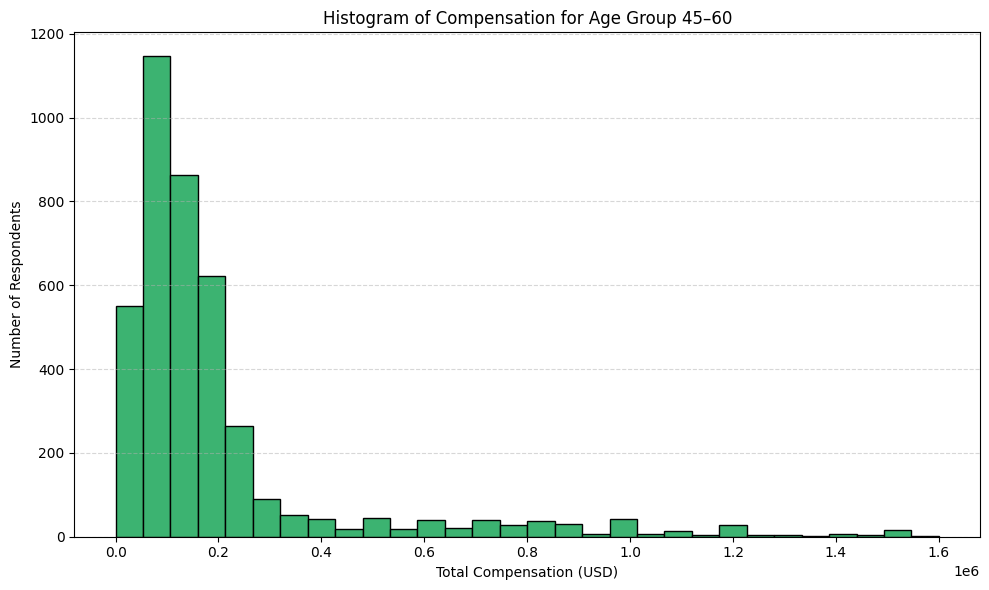

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Histogram of Compensation for Age Group 45–60')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [6]:
query = "SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

def clean_experience(val):
    try:
        val = val.strip().lower()
        if 'less than' in val:
            return 0.5
        elif 'more than' in val:
            return 51
        else:
            return float(val)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df = df.dropna(subset=['YearsCodePro'])
bins = [0, 5, 10, 20, 30, 50, float('inf')]
labels = ['0–5', '5–10', '10–20', '20–30', '30–50', '50+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['JobSat'])


In [9]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


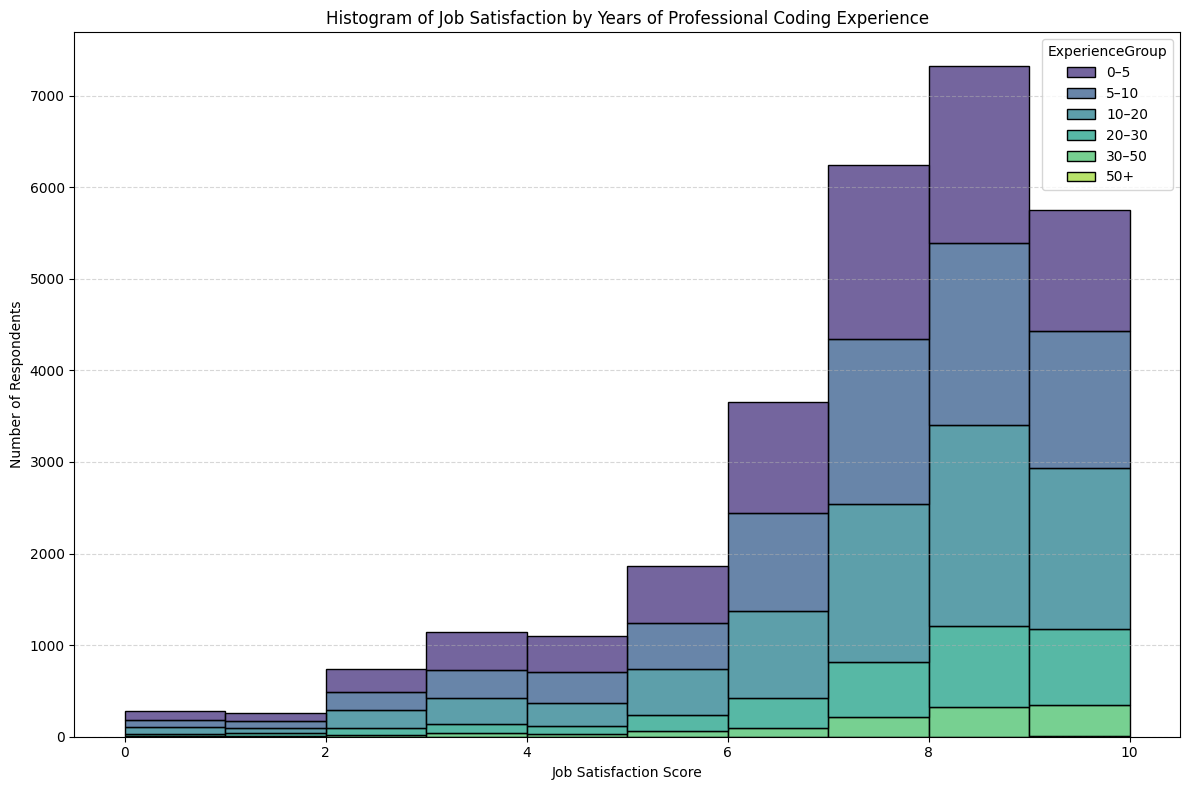

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='JobSat', hue='ExperienceGroup', bins=10, multiple='stack', palette='viridis')

plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
